In [17]:
import pandas as pd
import dateutil

%matplotlib inline

In [53]:
df = pd.read_csv("case_shiller_sf.csv", header=None, names=['month_year', 'csi'])

In [54]:
df['month'] = df.month_year.map(lambda x: x[:3])
df['year'] = df.month_year.map(lambda x: int(x[4:]))
df.head()

,month_year,csi,month,year
0,Jan-1980,31.00,Jan,1980
1,Feb-1980,30.99,Feb,1980
2,Mar-1980,31.24,Mar,1980
3,Apr-1980,31.48,Apr,1980
4,May-1980,31.81,May,1980


In [55]:
frame = df[df.month == 'Jan'][['year', 'csi']].set_index('year')

In [56]:
frame

,csi
year,
1980,31.00
1981,34.68
1982,35.33
1983,35.24
1984,36.83
1985,39.07
1986,42.25
1987,46.61
1988,52.24


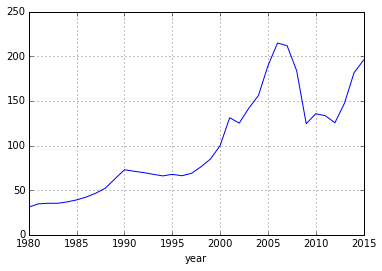

In [57]:
frame.csi.plot()

In [58]:
frame['years'] = frame.index - 1980
frame.csi /= frame.csi.iloc[0]
frame['cum_csi'] = frame.csi ** (1 / frame.years)
frame

,csi,years,cum_csi
year,,,
1980,1.000000,0,1.000000
1981,1.118710,1,1.118710
1982,1.139677,2,1.067557
1983,1.136774,3,1.043658
1984,1.188065,4,1.044023
1985,1.260323,5,1.047361
1986,1.362903,6,1.052957
1987,1.503548,7,1.059992
1988,1.685161,8,1.067407


In [59]:
inf = pd.read_csv("inflation_index.csv", parse_dates=['day'])
inf['year'] = inf.day.dt.year
inf = inf[['year', 'inflation_index']].set_index('year')
inf


,inflation_index
year,
1947,22.332
1948,24.045
1949,23.809
1950,24.063
1951,25.973
1952,26.567
1953,26.768
1954,26.865
1955,26.796


In [60]:
inf = inf.loc[1980:2014].copy()
inf.inflation_index /= inf.inflation_index.loc[1980]
inf['years'] = inf.index - 1980
inf['cum_inf_rate'] = inf.inflation_index ** (1 / inf.years)
inf

,inflation_index,years,cum_inf_rate
year,,,
1980,1.000000,0,1.000000
1981,1.103784,1,1.103784
1982,1.171759,2,1.082478
1983,1.208781,3,1.065244
1984,1.261583,4,1.059812
1985,1.306095,5,1.054860
1986,1.331488,6,1.048873
1987,1.379132,7,1.046993
1988,1.435672,8,1.046241


In [62]:
frame['cum_inf_rate'] = inf.cum_inf_rate
frame['inf_index'] = inf.inflation_index
frame

,csi,years,cum_csi,cum_inf_rate,inf_index
year,,,,,
1980,1.000000,0,1.000000,1.000000,1.000000
1981,1.118710,1,1.118710,1.103784,1.103784
1982,1.139677,2,1.067557,1.082478,1.171759
1983,1.136774,3,1.043658,1.065244,1.208781
1984,1.188065,4,1.044023,1.059812,1.261583
1985,1.260323,5,1.047361,1.054860,1.306095
1986,1.362903,6,1.052957,1.048873,1.331488
1987,1.503548,7,1.059992,1.046993,1.379132
1988,1.685161,8,1.067407,1.046241,1.435672


In [64]:
frame['cum_real_return'] = frame.cum_csi - frame.cum_inf_rate
frame['yoy_return'] = frame.csi / frame.csi.shift(1)
frame['yoy_inflation'] = frame.inf_index / frame.inf_index.shift(1)
frame['yoy_real_return'] = frame.yoy_return - frame.yoy_inflation
frame

,csi,years,cum_csi,cum_inf_rate,inf_index,cum_real_return,yoy_return,yoy_inflation,yoy_real_return
year,,,,,,,,,
1980,1.000000,0,1.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN
1981,1.118710,1,1.118710,1.103784,1.103784,0.014926,1.118710,1.103784,0.014926
1982,1.139677,2,1.067557,1.082478,1.171759,-0.014921,1.018743,1.061584,-0.042841
1983,1.136774,3,1.043658,1.065244,1.208781,-0.021587,0.997453,1.031595,-0.034143
1984,1.188065,4,1.044023,1.059812,1.261583,-0.015789,1.045119,1.043682,0.001437
1985,1.260323,5,1.047361,1.054860,1.306095,-0.007499,1.060820,1.035282,0.025538
1986,1.362903,6,1.052957,1.048873,1.331488,0.004085,1.081392,1.019442,0.061950
1987,1.503548,7,1.059992,1.046993,1.379132,0.012999,1.103195,1.035782,0.067413
1988,1.685161,8,1.067407,1.046241,1.435672,0.021166,1.120790,1.040997,0.079792


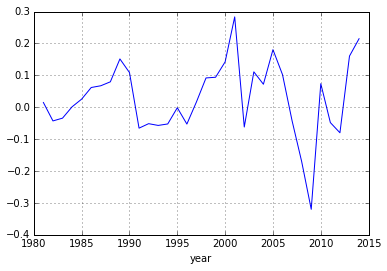

In [65]:
frame.yoy_real_return.plot()

In [66]:
frame.yoy_real_return.describe()

count    34.000000
mean      0.028672
std       0.115886
min      -0.320013
25%      -0.050639
50%       0.021110
75%       0.100087
max       0.283434
Name: yoy_real_return, dtype: float64

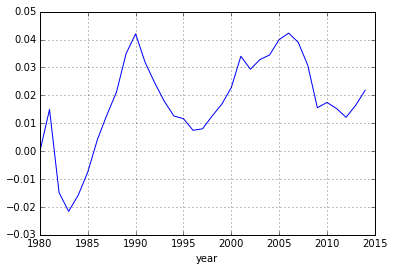

In [67]:
frame.cum_real_return.plot()

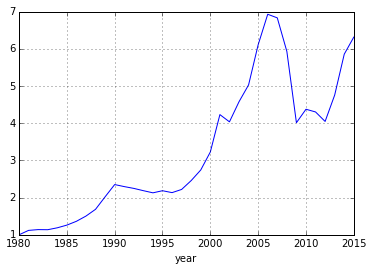

In [68]:
frame.csi.plot()

In [79]:
frame['5yr_return'] = (frame.csi / frame.csi.shift(5) - 1)
frame['5yr_inf'] = (frame.inf_index / frame.inf_index.shift(5) - 1)
frame['5yr_real_return'] = frame['5yr_return'] - frame['5yr_inf']
frame

,csi,years,cum_csi,cum_inf_rate,inf_index,cum_real_return,yoy_return,yoy_inflation,yoy_real_return,5yr_return,5yr_inf,5yr_real_return
year,,,,,,,,,,,,
1980,1.000000,0,1.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1981,1.118710,1,1.118710,1.103784,1.103784,0.014926,1.118710,1.103784,0.014926,NaN,NaN,NaN
1982,1.139677,2,1.067557,1.082478,1.171759,-0.014921,1.018743,1.061584,-0.042841,NaN,NaN,NaN
1983,1.136774,3,1.043658,1.065244,1.208781,-0.021587,0.997453,1.031595,-0.034143,NaN,NaN,NaN
1984,1.188065,4,1.044023,1.059812,1.261583,-0.015789,1.045119,1.043682,0.001437,NaN,NaN,NaN
1985,1.260323,5,1.047361,1.054860,1.306095,-0.007499,1.060820,1.035282,0.025538,0.260323,0.306095,-0.045772
1986,1.362903,6,1.052957,1.048873,1.331488,0.004085,1.081392,1.019442,0.061950,0.218281,0.206295,0.011987
1987,1.503548,7,1.059992,1.046993,1.379132,0.012999,1.103195,1.035782,0.067413,0.319275,0.176976,0.142300
1988,1.685161,8,1.067407,1.046241,1.435672,0.021166,1.120790,1.040997,0.079792,0.482406,0.187703,0.294704


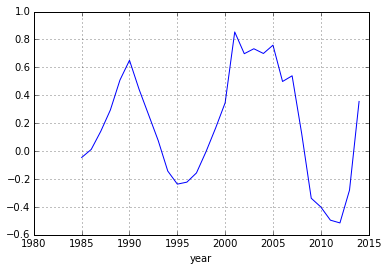

In [74]:
frame['5yr_real_return'].plot()

In [77]:
frame['5yr_real_return'].sort(inplace=False)

year
2012   -0.514884
2011   -0.494996
2010   -0.400517
2009   -0.338024
2013   -0.280079
1995   -0.236810
1996   -0.222488
1997   -0.156578
1994   -0.142938
1985   -0.045772
1998   -0.004034
1986    0.011987
1993    0.075764
2008    0.125490
1987    0.142300
1999    0.164872
1992    0.259823
1988    0.294704
2000    0.346456
2014    0.355946
1991    0.443139
2006    0.499066
1989    0.508812
2007    0.539717
1990    0.650820
2002    0.698258
2004    0.699806
2003    0.733670
2005    0.759493
2001    0.854090
1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
2015         NaN
Name: 5yr_real_return, dtype: float64

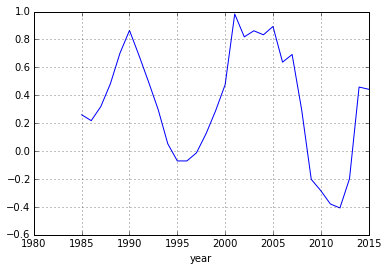

In [80]:
frame['5yr_return'].plot()

In [81]:
frame['5yr_return'].sort(inplace=False)

year
2012   -0.407546
2011   -0.379039
2010   -0.283707
2009   -0.202206
2013   -0.197813
1995   -0.070537
1996   -0.070535
1997   -0.012487
1994    0.052984
1998    0.124244
1986    0.218281
1985    0.260323
1999    0.288724
2008    0.295349
1993    0.297282
1987    0.319275
2015    0.443338
2014    0.459164
2000    0.476451
1988    0.482406
1992    0.494744
2006    0.637542
1991    0.684497
2007    0.692480
1989    0.701330
2002    0.818750
2004    0.833823
2003    0.862449
1990    0.865114
2005    0.893500
2001    0.982766
1980         NaN
1981         NaN
1982         NaN
1983         NaN
1984         NaN
Name: 5yr_return, dtype: float64